In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Stacked bar chart to show sales by region for each publisher in the data. 

In [2]:
df = pd.read_csv("top100videogamesales.csv")

In [3]:
publisher_sales = df.groupby("Publisher")[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()


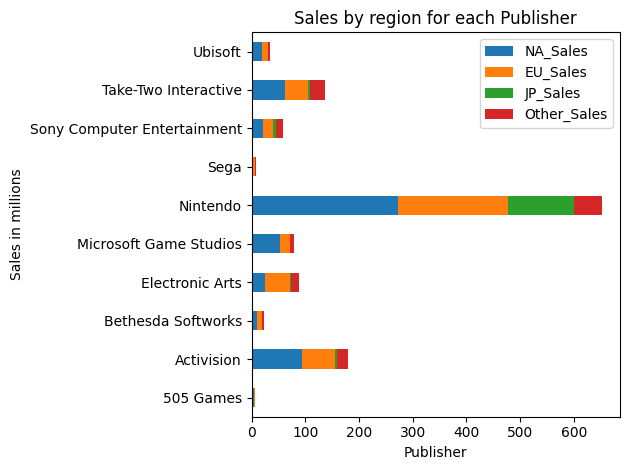

In [4]:
publisher_sales.plot(kind="barh", stacked=True)
plt.title("Sales by region for each Publisher")
plt.ylabel("Sales in millions")
plt.xlabel("Publisher")
plt.tight_layout()
plt.show()

## Global Sales by Year with line chart

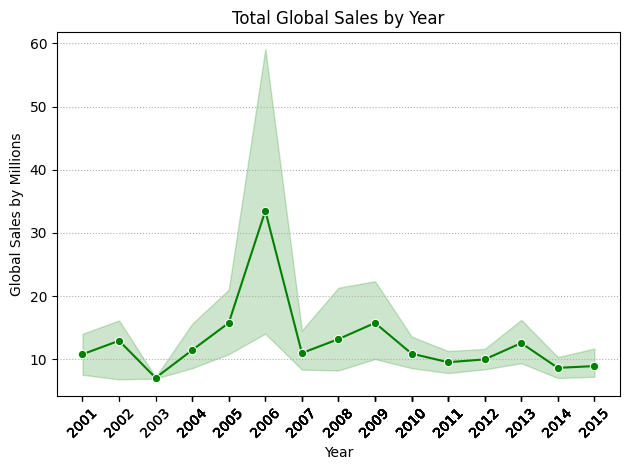

In [5]:
global_sales_by_year = df.sort_values("Year")
sns.lineplot(data=global_sales_by_year, x = "Year", y = "Global_Sales",
             marker="o", color="green")
plt.title("Total Global Sales by Year")
plt.xlabel("Year")
plt.ylabel("Global Sales by Millions")
plt.xticks(global_sales_by_year["Year"], rotation=45)
plt.grid(True, axis='y', linestyle=':')
plt.tight_layout()
plt.show()

In [6]:
action = df[df["Genre"]=="Action"].copy()
action["Global_Sales"] = action[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum(axis=1)

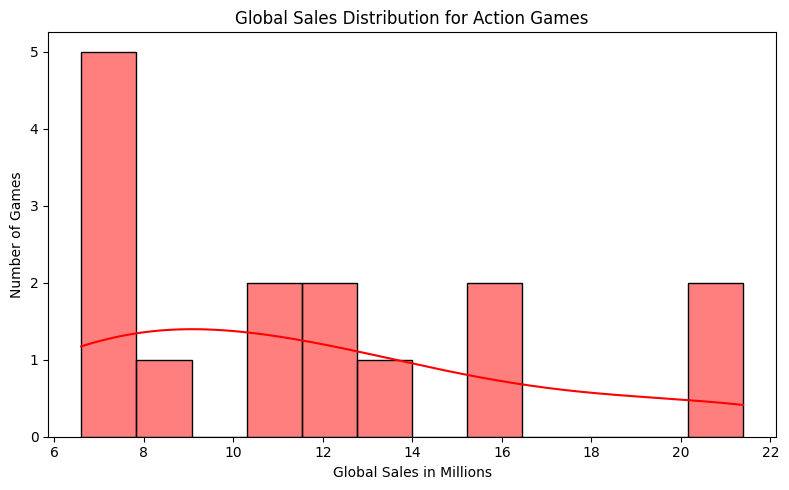

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(action["Global_Sales"], bins=12, kde=True, color="red")
plt.title("Global Sales Distribution for Action Games")
plt.xlabel("Global Sales in Millions")
plt.ylabel("Number of Games")
plt.tight_layout()
plt.show()

The most common sales range for these games is about 6 to 8 million, with a few peeks from 11-13 million, and one at 16. After that there is only a couple games that sold in the 21 million range.

In [8]:
na_by_genre = df.groupby("Genre")["NA_Sales"].sum().sort_values(ascending=False)
threshold = 0.03 * na_by_genre.sum()
total = na_by_genre.sum()
main_genres = na_by_genre[na_by_genre >= threshold]
other_genres = na_by_genre[na_by_genre < threshold]


# Add "Other" category
main_genres['Other'] = other_genres.sum()
#Genres in main
print(main_genres)
#Genres in "Other"
print("\nGenres in 'Other':")
print(other_genres)
main_genres['Other'] = other_genres.sum()
    

Genre
Shooter         140.44
Sports           84.87
Action           77.81
Misc             70.60
Racing           56.45
Platform         52.67
Role-Playing     50.48
Other            32.45
Name: NA_Sales, dtype: float64

Genres in 'Other':
Genre
Simulation    14.61
Fighting      14.40
Puzzle         3.44
Name: NA_Sales, dtype: float64


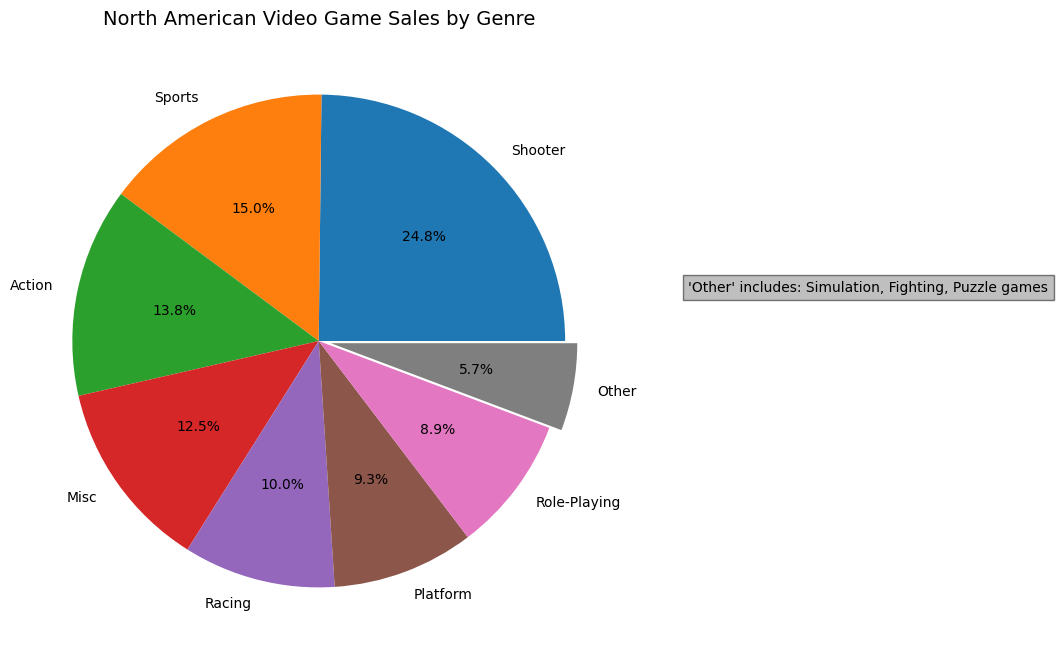

In [9]:
explode = [0.05 if genre == "Other" else 0 for genre in main_genres.index]

plt.figure(figsize=(8,8))
plt.pie(
    main_genres,
    labels=main_genres.index,
    explode=explode,
    autopct='%1.1f%%'
)
plt.title("North American Video Game Sales by Genre", fontsize=14)
other_list = ", ".join(other_genres.index.tolist())
plt.text(1.5, .2, f"'Other' includes: {other_list} games", fontsize=10, bbox=dict(facecolor='grey', alpha=0.5))


plt.show()

In [11]:
eu_by_genre = df.groupby("Genre")["EU_Sales"].sum().sort_values(ascending=False)
threshold = 0.03 * eu_by_genre.sum()
total_eu = eu_by_genre.sum()
main_eu = eu_by_genre[eu_by_genre >= threshold]
other_eu = eu_by_genre[eu_by_genre < threshold]


# Add "Other" category
main_eu['Other'] = other_eu.sum()
#Genres in main
print(main_eu)
#Genres in "Other"
print("\nGenres in 'Other':")
print(other_eu)
main_eu['Other'] = other_eu.sum()

Genre
Sports          82.18
Shooter         81.63
Action          58.15
Misc            48.00
Racing          44.03
Role-Playing    36.20
Platform        33.12
Simulation      23.26
Other           10.36
Name: EU_Sales, dtype: float64

Genres in 'Other':
Genre
Puzzle      5.36
Fighting    5.00
Name: EU_Sales, dtype: float64


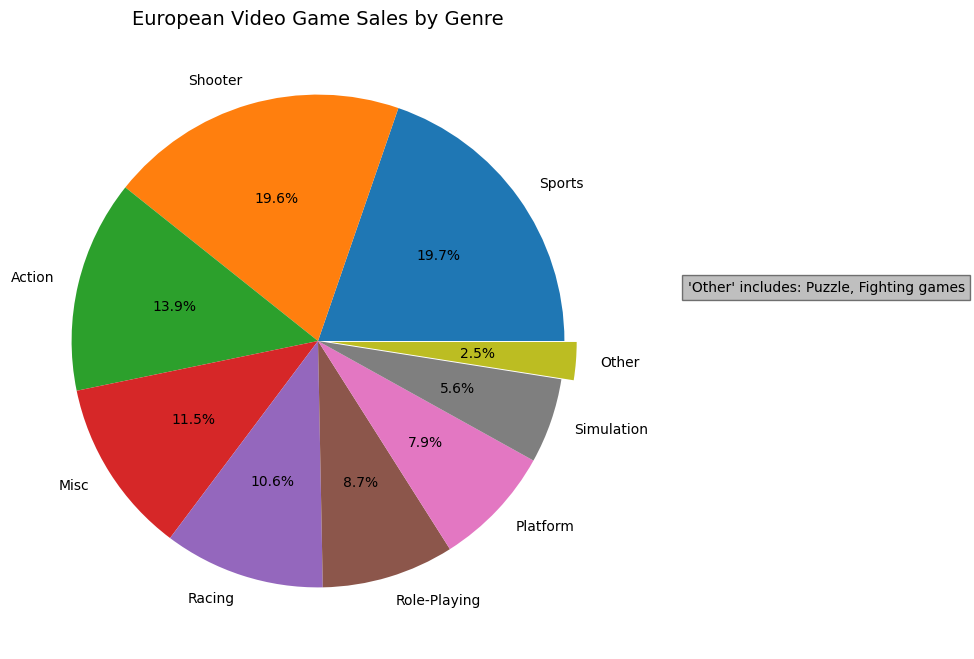

In [12]:
explode2 = [0.05 if genre == "Other" else 0 for genre in main_eu.index]

plt.figure(figsize=(8,8))
plt.pie(
    main_eu,
    labels=main_eu.index,
    explode=explode2,
    autopct='%1.1f%%'
)
plt.title("European Video Game Sales by Genre", fontsize=14)
other_list2 = ", ".join(other_eu.index.tolist())
plt.text(1.5, .2, f"'Other' includes: {other_list2} games", fontsize=10, bbox=dict(facecolor='grey', alpha=0.5))


plt.show()